In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.rcParams["figure.facecolor"] = "w"
sns.set_style('whitegrid')

#### Иллюстрация про время приезда

In [3]:
N = 100000
t = 5

rand = np.random.seed(42)
arrival_times = (N * t * np.sort(np.random.rand(N))).astype(int)
diff_arrival = np.diff(arrival_times)

In [4]:
diff_arrival[:10]

array([ 2,  1,  3,  6,  1,  8,  1,  2,  7, 13])

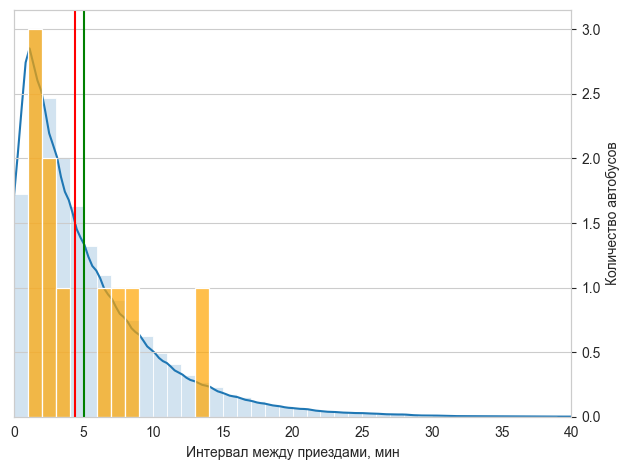

In [5]:
sns.histplot(
    diff_arrival, kde=True, bins=np.arange(0, 40, 1),
    stat='probability', alpha=0.2
)

plt.xlim([0, 40])
plt.ylabel('')
plt.grid(None)
plt.yticks([])

plt.xlabel('Интервал между приездами, мин')

plt.twinx()

sns.histplot(
    diff_arrival[:10], bins=np.arange(0, 40, 1),
    color='orange', alpha=0.7)

plt.xlabel('Интервал между приездами, мин')
plt.ylabel('Количество автобусов')
plt.axvline(x=5, color='green')
plt.axvline(x=np.mean(diff_arrival[:10]), color='red')
plt.tight_layout()

plt.savefig('bus10.pdf')

In [6]:
np.mean(diff_arrival[:10])

4.4

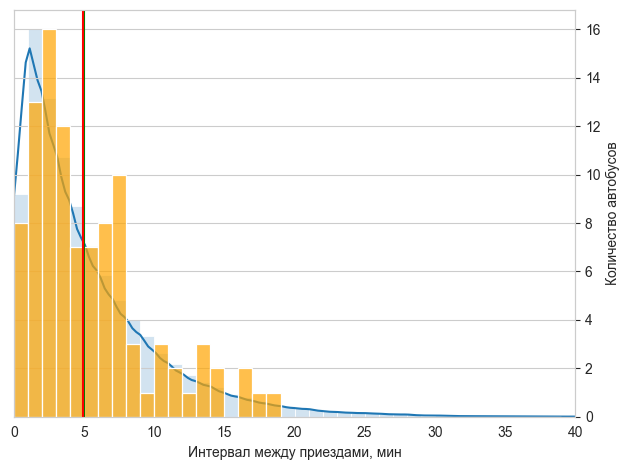

In [7]:
sns.histplot(
    diff_arrival, kde=True, bins=np.arange(0, 40, 1),
    stat='probability', alpha=0.2
)

plt.xlim([0, 40])
plt.ylabel('')
plt.grid(None)
plt.yticks([])

plt.xlabel('Интервал между приездами, мин')

plt.twinx()

sns.histplot(
    diff_arrival[:100], bins=np.arange(0, 40, 1),
    color='orange', alpha=0.7)

plt.xlabel('Интервал между приездами, мин')
plt.ylabel('Количество автобусов')
plt.axvline(x=5, color='green')
plt.axvline(x=np.mean(diff_arrival[:100]), color='red')
plt.tight_layout()

plt.savefig('bus100.pdf')

In [8]:
np.mean(diff_arrival[:100])

4.93

#### Иллюстрация про повторение генерации

In [9]:
rand = np.random.seed(42)

N = 100
t = 5

arrival_times = (N * t * np.sort(np.random.rand(N))).astype(int)
diff_arrival = np.diff(arrival_times)
diff_arrival[:10]

array([8, 2, 5, 5, 1, 6, 2, 1, 5, 0])

In [10]:
N = 100
t = 5

arrival_times = (N * t * np.sort(np.random.rand(N))).astype(int)
diff_arrival = np.diff(arrival_times)
diff_arrival[:10]

array([ 5,  7,  3,  2,  5, 13,  7,  1,  9,  1])

In [11]:
np.mean(diff_arrival)

4.9393939393939394

#### Наивный бутстрэп

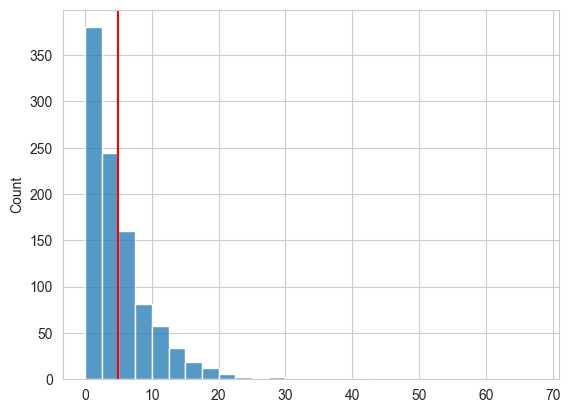

In [12]:
t = 5

def get_samples(size):
    arrival_times = (size + 1) * t * np.sort(np.random.rand((size + 1)))
    return np.diff(arrival_times)

data = get_samples(size=1000)
sns.histplot(data, bins=np.arange(0, 70, 2.5))
plt.axvline(x=np.mean(data), color='red')
plt.show()

In [13]:
means = []
size = 1000
n_iter = 1000

for _ in range(n_iter):
    samples = get_samples(size=size)
    mean = np.mean(samples)
    means.append(mean)

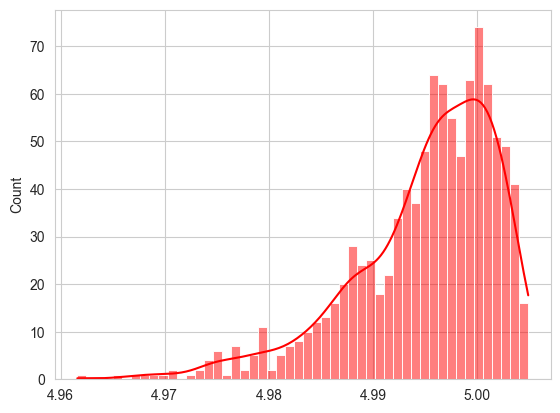

In [14]:
sns.histplot(means, bins=50, kde=True, color='red', alpha=0.5)
plt.show()

#### Бутстрэп

In [15]:
np.random.seed(797)

In [16]:
size = 1000
data = get_samples(size=size)

In [17]:
means = []
n_iter = 1000

for _ in range(n_iter):
    samples = np.random.choice(data, size=size, replace=True)
    mean = np.mean(samples)
    means.append(mean)

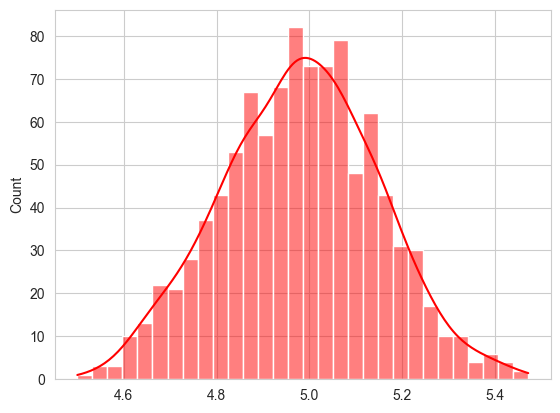

In [18]:
sns.histplot(means, bins=30, kde=True, color='red', alpha=0.5)
plt.show()

#### Квантили

In [19]:
means = np.array(means)
q = np.quantile(means, q=0.05)
np.mean(means < q)

0.05

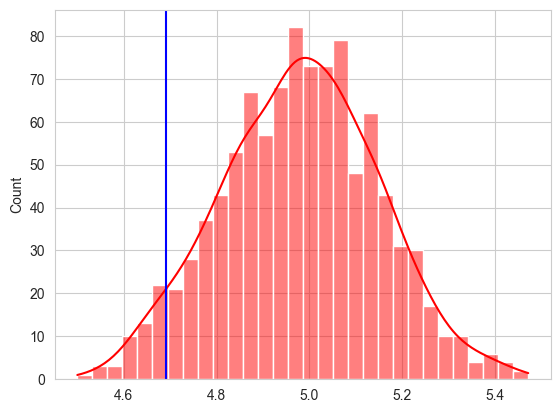

In [20]:
sns.histplot(means, bins=30, kde=True, color='red', alpha=0.5)
plt.axvline(x=q, color='blue')
plt.show()

#### Доверительный интервал через квантили

In [21]:
alpha = 0.05
ci = np.quantile(means, q=[0.025, 0.975])
ci

array([4.65009086, 5.31194005])

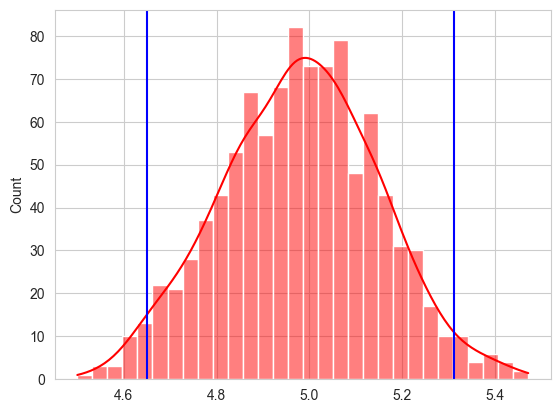

In [22]:
sns.histplot(means, bins=30, kde=True, color='red', alpha=0.5)
plt.axvline(x=ci[0], color='blue')
plt.axvline(x=ci[1], color='blue')
plt.show()

In [23]:
alpha = 0.05
ci = np.quantile(means, q=[alpha / 2, 1 - alpha / 2])
ci

array([4.65009086, 5.31194005])

In [24]:
from scipy.stats import bootstrap
bootstrap(
    data=(data,),
    statistic=np.mean,
    confidence_level=0.95,
    n_resamples=1000,
    method='percentile',
).confidence_interval

ConfidenceInterval(low=4.657233480111648, high=5.307853154781098)

#### Иллюстрация про рост

In [25]:
np.random.seed(125)
hh = np.random.normal(loc=170, scale=10, size=100000)

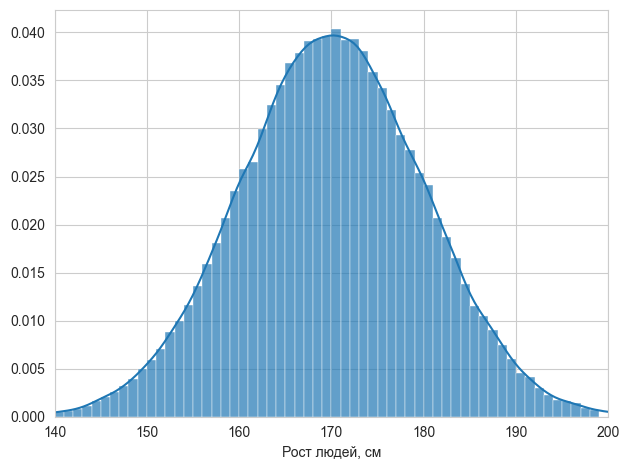

In [26]:
sns.histplot(hh, kde=True, bins=np.arange(100, 200, 1),
             stat='probability', alpha=0.7)

plt.xlim([140, 200])
plt.ylabel('')

plt.xlabel('Рост людей, см')

plt.tight_layout()
plt.savefig('normal_h.pdf')

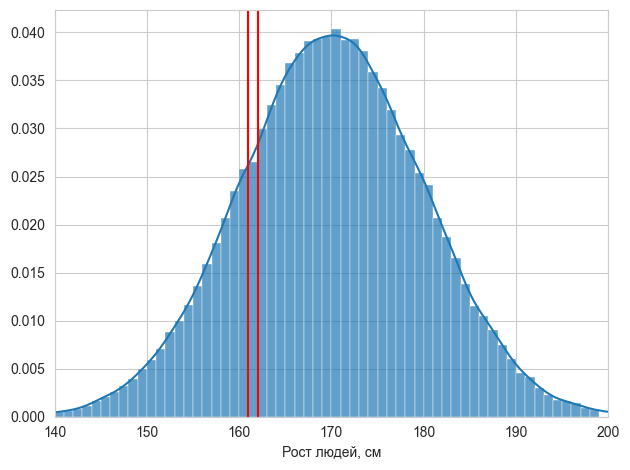

In [27]:
sns.histplot(hh, kde=True, bins=np.arange(100, 200, 1),
             stat='probability', alpha=0.7)

plt.xlim([140, 200])
plt.ylabel('')
plt.axvline(x=161, color='red', label='161')
plt.axvline(x=162, color='red', label='165')

plt.xlabel('Рост людей, см')

plt.tight_layout()
plt.savefig('normal_h_prob.pdf')

#### Нормальное распределение

In [28]:
np.random.seed(125)
hh = np.random.normal(loc=170, scale=10, size=100000)

In [29]:
hh[:10]

array([163.01163056, 170.10623077, 160.53213557, 173.28729981,
       173.15064573, 165.97177563, 143.66696282, 172.01970498,
       165.92673878, 196.86967748])

In [30]:
np.mean(hh), np.std(hh)

(170.03073809450893, 9.985858227604883)

In [31]:
new_hh = (hh - np.mean(hh)) / np.std(hh)

In [32]:
np.mean(new_hh), np.std(new_hh)

(-6.673062102890981e-16, 1.0)

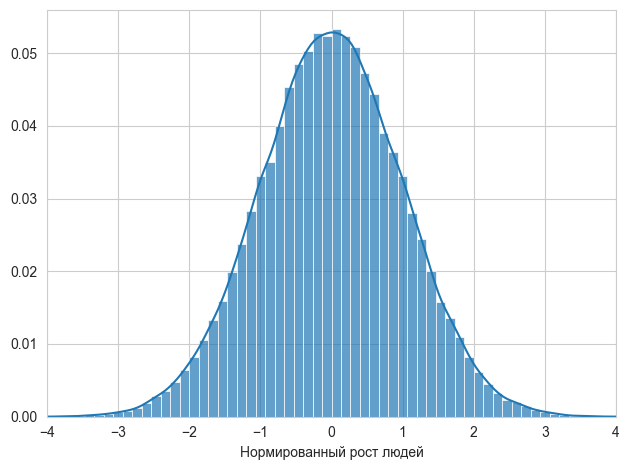

In [33]:
sns.histplot(new_hh, kde=True, bins=np.linspace(-4, 4, 61),
             stat='probability', alpha=0.7)

plt.xlim([-4, 4])
plt.ylabel('')

plt.xlabel('Нормированный рост людей')

plt.tight_layout()
plt.savefig('normal_h_normed.pdf')

#### ЦПТ

Для нормального распределения

In [34]:
sums = []
size = 100
n_iter = 10000

for _ in range(n_iter):
    samples = np.random.normal(loc=2, scale=5, size=size)
    sum_ = np.sum(samples)
    sums.append(sum_)

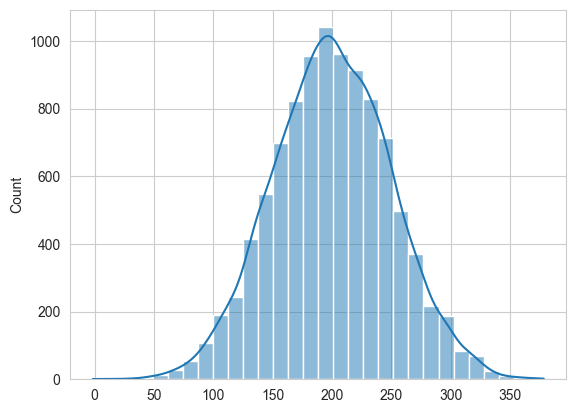

In [35]:
sns.histplot(sums, bins=30, kde=True)
plt.show()

Логнормальное распределение

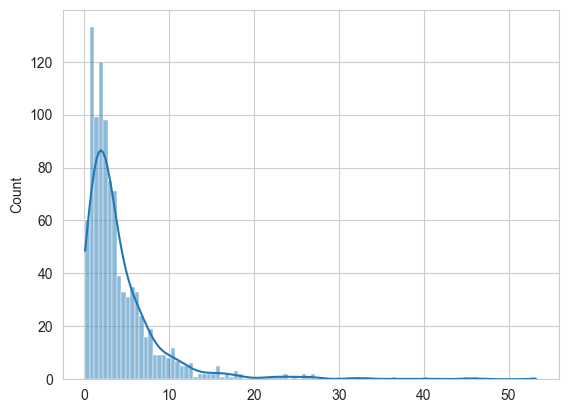

In [36]:
size = 1000
samples = np.random.lognormal(mean=1, sigma=1, size=size)

sns.histplot(samples, bins=100, kde=True)
plt.show()

In [37]:
sums = []
size = 100
n_iter = 10000

for _ in range(n_iter):
    samples = np.random.lognormal(mean=1, sigma=1, size=size)
    sum_ = np.sum(samples)
    sums.append(sum_)

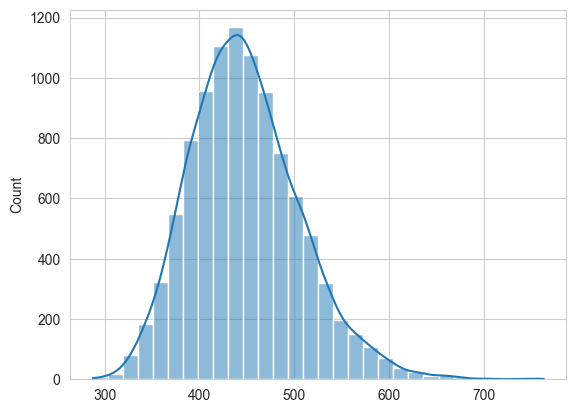

In [38]:
sns.histplot(sums, bins=30, kde=True)
plt.show()

In [39]:
sums = []
size = 100
n_iter = 10000

for _ in range(n_iter):
    samples = np.random.lognormal(mean=1, sigma=1, size=size)
    sum_ = np.sum(samples)
    sums.append(sum_)

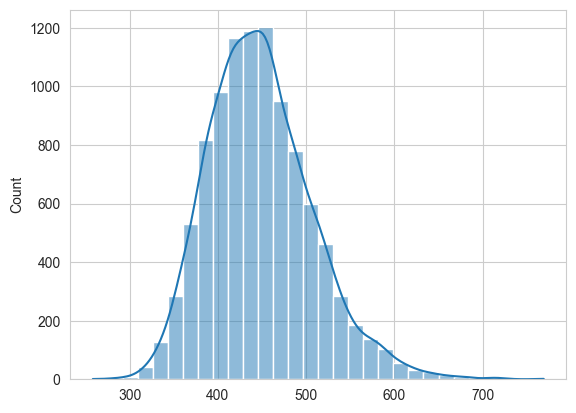

In [40]:
sns.histplot(sums, bins=30, kde=True)
plt.show()

Распределение Пуассона

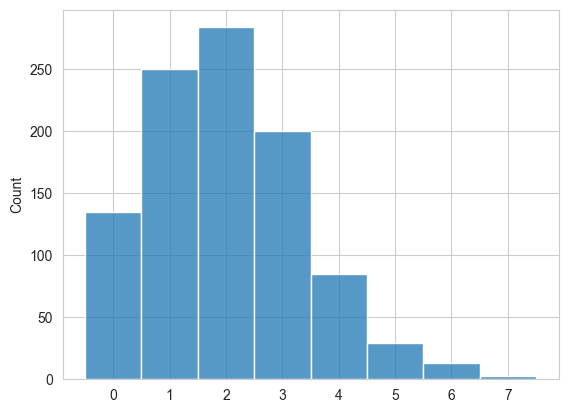

In [41]:
size = 1000
samples = np.random.poisson(lam=2, size=size)

sns.histplot(samples, bins=np.arange(-0.5, 8.5, 1), kde=False)
plt.show()

In [42]:
sums = []
size = 100
n_iter = 10000

for _ in range(n_iter):
    samples = np.random.poisson(lam=2, size=size)
    sum_ = np.sum(samples)
    sums.append(sum_)

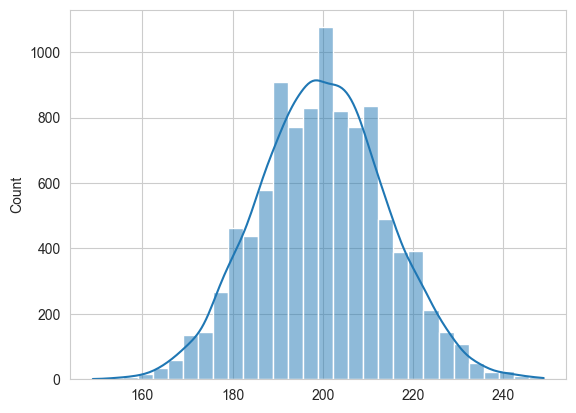

In [43]:
sns.histplot(sums, bins=30, kde=True)
plt.show()

#### Снова про рост людей

In [44]:
means = []
size = 100
n_iter = 10000

for _ in range(n_iter):
    samples = np.random.normal(loc=170, scale=10, size=size)
    mean_ = np.mean(samples)
    means.append(mean_)

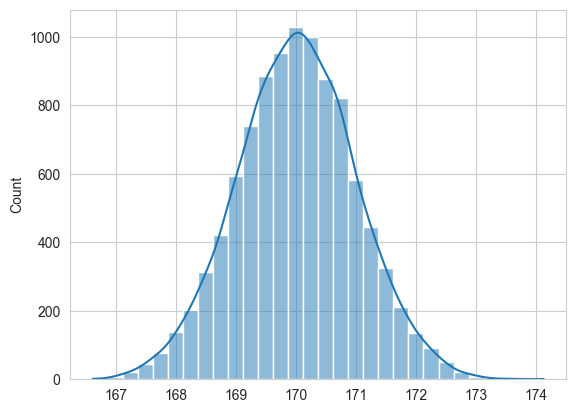

In [45]:
sns.histplot(means, bins=30, kde=True)
plt.show()

Больше данных

In [46]:
means = []
size = 1000
n_iter = 10000

for _ in range(n_iter):
    samples = np.random.normal(loc=170, scale=10, size=size)
    mean_ = np.mean(samples)
    means.append(mean_)

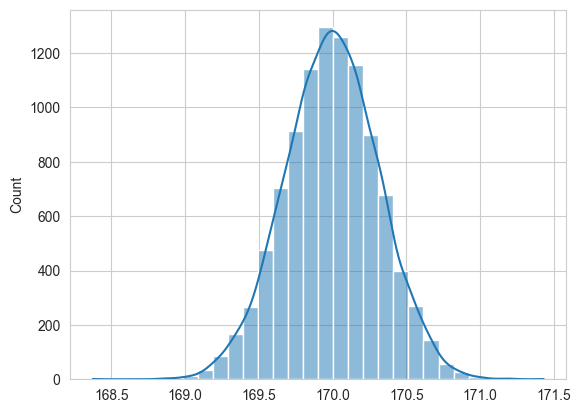

In [47]:
sns.histplot(means, bins=30, kde=True)
plt.show()

И ещё больше данных

In [48]:
means = []
size = 10000
n_iter = 10000

for _ in range(n_iter):
    samples = np.random.normal(loc=170, scale=10, size=size)
    mean_ = np.mean(samples)
    means.append(mean_)

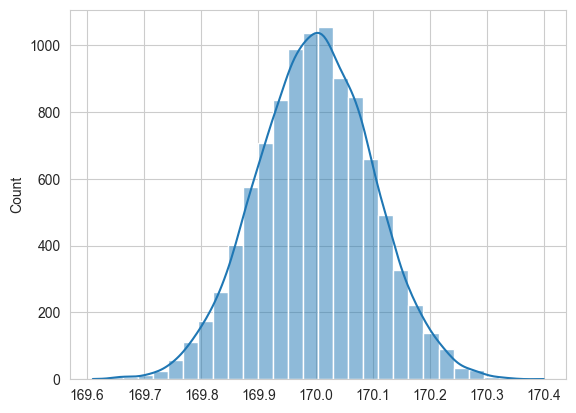

In [49]:
sns.histplot(means, bins=30, kde=True)
plt.show()

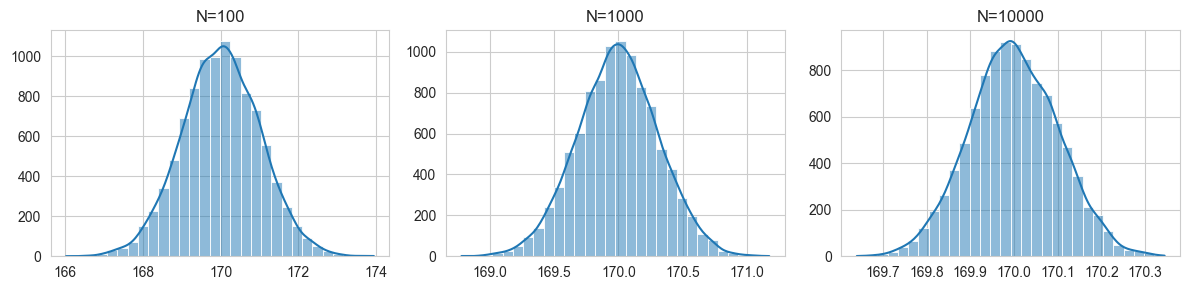

In [50]:
n_iter = 10000
plt.figure(figsize=(12, 3))

plt.subplot(1, 3, 1)
means = []
size = 100
for _ in range(n_iter):
    samples = np.random.normal(loc=170, scale=10, size=size)
    mean_ = np.mean(samples)
    means.append(mean_)
sns.histplot(means, bins=30, kde=True)
plt.ylabel('')
plt.title('N=100')

plt.subplot(1, 3, 2)
means = []
size = 1000
for _ in range(n_iter):
    samples = np.random.normal(loc=170, scale=10, size=size)
    mean_ = np.mean(samples)
    means.append(mean_)
sns.histplot(means, bins=30, kde=True)
plt.ylabel('')
plt.title('N=1000')

plt.subplot(1, 3, 3)
means = []
size = 10000
for _ in range(n_iter):
    samples = np.random.normal(loc=170, scale=10, size=size)
    mean_ = np.mean(samples)
    means.append(mean_)
sns.histplot(means, bins=30, kde=True)
plt.ylabel('')
plt.title('N=10000')

plt.tight_layout()
plt.savefig('cpt.pdf')
plt.show()

Примением ЦПТ

In [51]:
means = []
size = 1000
n_iter = 10000

for _ in range(n_iter):
    samples = np.random.normal(loc=170, scale=10, size=size)
    mean_ = np.mean(samples)
    means.append(mean_)

In [52]:
means = np.array(means)
means.mean(), means.std()

(170.00083280488792, 0.3131691518685689)

In [53]:
170, 10 / size ** 0.5

(170, 0.31622776601683794)

In [54]:
from scipy.stats import norm

norm().ppf(q=0.001)

-3.090232306167813

In [55]:
norm().ppf(q=0.025)

-1.9599639845400545

In [56]:
norm().ppf(q=0.15)

-1.0364333894937898

И ещё раз

In [57]:
mu, sigma = 170, 15
means = []
size = 100
n_iter = 10000

for _ in range(n_iter):
    samples = np.random.normal(loc=mu, scale=sigma, size=size)
    mean_ = np.mean(samples)
    means.append(mean_)

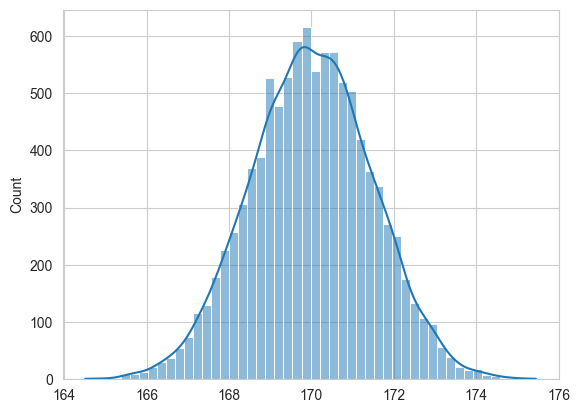

In [58]:
sns.histplot(means, bins=50, kde=True)
plt.show()

In [59]:
se = sigma / size ** 0.5
se

1.5

In [60]:
norm().ppf(q=0.025)

-1.9599639845400545

In [61]:
mu - 1.96 * se, mu + 1.96 * se

(167.06, 172.94)

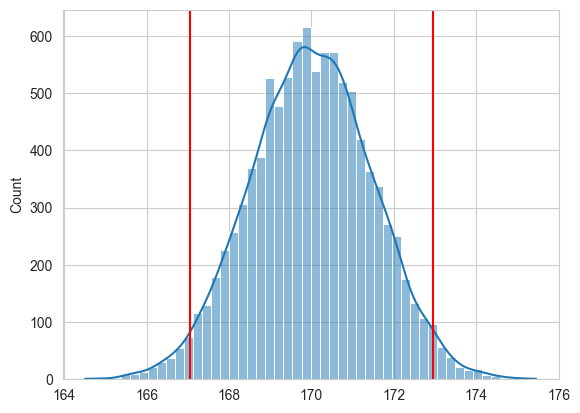

In [62]:
sns.histplot(means, bins=50, kde=True)
plt.axvline(x=mu - 1.96 * se, color='red')
plt.axvline(x=mu + 1.96 * se, color='red')
plt.show()

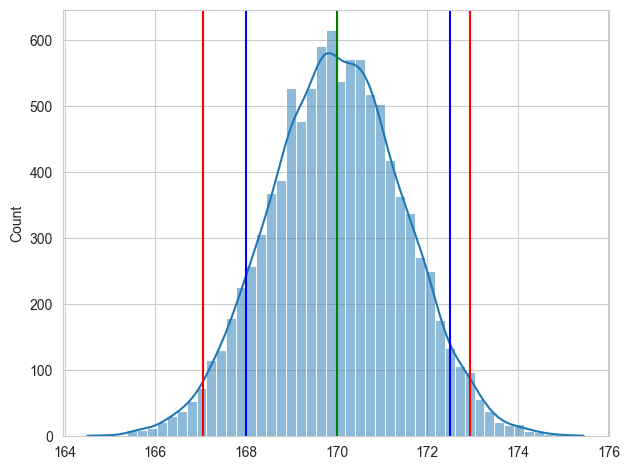

In [63]:
sns.histplot(means, bins=50, kde=True, alpha=0.5)
plt.axvline(x=mu - 1.96 * se, color='red')
plt.axvline(x=mu + 1.96 * se, color='red')
plt.axvline(x=mu, color='green')
plt.axvline(x=168, color='blue')
plt.axvline(x=172.5, color='blue')
plt.tight_layout()
plt.savefig('cpt_dist_2s.pdf')
plt.show()

Построим доверительный интервал

In [64]:
mu, sigma = 170, 15
size = 100

data = np.random.normal(loc=mu, scale=sigma, size=size)
mean = np.mean(data)
std = np.std(data)

mean - 1.96 * std / size ** 0.5, mean + 1.96 * std / size ** 0.5

(165.90287366296184, 172.12519664324435)

#### Доверительный интервал для известной дисперсии

In [65]:
mu, sigma = 170, 15
size = 100
data = np.random.normal(loc=mu, scale=sigma, size=size)

alpha = 0.05
mean = np.mean(data)
z_alpha2 = norm().ppf(q=1-alpha/2)

mean - z_alpha2 * sigma / size ** 0.5, mean + z_alpha2 * sigma / size ** 0.5

(167.60074862551065, 173.48064057913084)

#### z-преобразование

In [66]:
mu, sigma = 170, 15
zs = []
size = 10
n_iter = 10000

for _ in range(n_iter):
    samples = np.random.normal(loc=mu, scale=sigma, size=size)
    mean_ = np.mean(samples)
    zs.append((mean_ - mu) / (sigma / size ** 0.5))

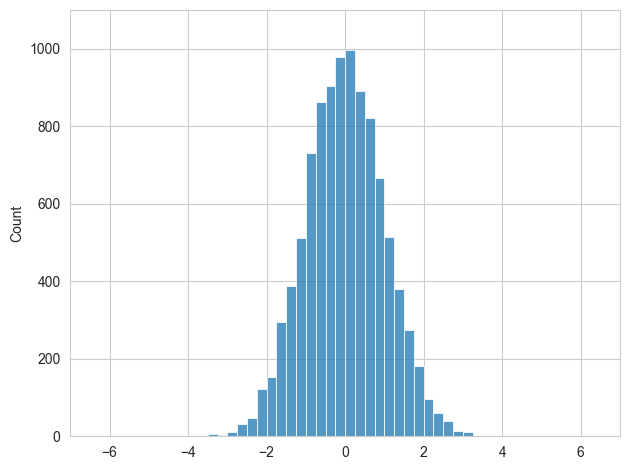

In [67]:
sns.histplot(zs, bins=np.arange(-7.5, 7.6, 0.25), kde=False)
plt.xlim([-7, 7])
plt.ylim([0, 1100])
plt.tight_layout()
plt.savefig('znorm.pdf')
plt.show()

А если не знаем дисперсию:

In [68]:
mu, sigma = 170, 15
zs = []
size = 10
n_iter = 10000

for _ in range(n_iter):
    samples = np.random.normal(loc=mu, scale=sigma, size=size)
    mean_ = np.mean(samples)
    zs.append((mean_ - mu) / (np.std(samples) / size ** 0.5))

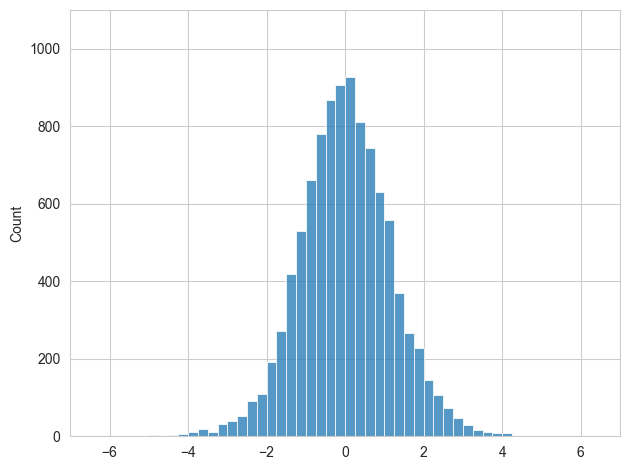

In [69]:
sns.histplot(zs, bins=np.arange(-7.5, 7.6, 0.25), kde=False)
plt.xlim([-7, 7])
plt.ylim([0, 1100])
plt.tight_layout()
plt.savefig('tnorm.pdf')
plt.show()

#### Доверительный интервал для неизвестной дисперсии

In [70]:
from scipy.stats import t

alpha = 0.05

mean = np.mean(data)
std = np.std(data)
t_alpha2 = t.ppf(q=1-alpha/2, df=N-1)

print(mean - t_alpha2 * std / size ** 0.5, mean + t_alpha2 * std / size ** 0.5)

162.3878803663166 178.69350883832487


#### Сравнение преобразований

In [71]:
mu, sigma = 170, 15
ts, zs = [], []
size, n_iter = 10, 10000
for _ in range(n_iter):
    samples = np.random.normal(loc=mu, scale=sigma, size=size)
    mean_ = np.mean(samples)
    zs.append((mean_ - mu) / (sigma / size ** 0.5))
    ts.append((mean_ - mu) / (np.std(samples) / size ** 0.5))

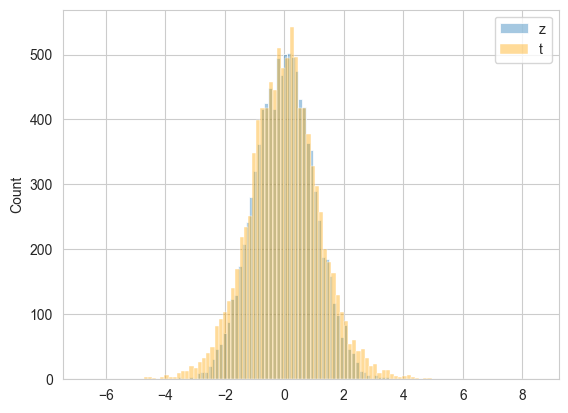

In [72]:
sns.histplot(zs, alpha=0.4, label='z')
sns.histplot(ts, alpha=0.4, label='t', color='orange')
plt.legend(loc=1)
plt.show()

In [73]:
mu, sigma = 170, 15
ts, zs = [], []
size, n_iter = 1000, 10000
for _ in range(n_iter):
    samples = np.random.normal(loc=mu, scale=sigma, size=size)
    mean_ = np.mean(samples)
    zs.append((mean_ - mu) / (sigma / size ** 0.5))
    ts.append((mean_ - mu) / (np.std(samples) / size ** 0.5))

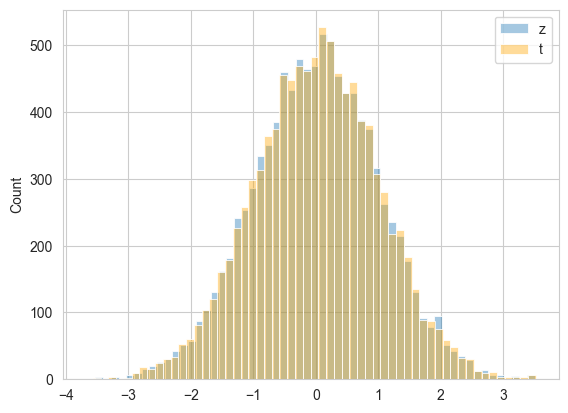

In [74]:
sns.histplot(zs, alpha=0.4, label='z')
sns.histplot(ts, alpha=0.4, label='t', color='orange')
plt.legend(loc=1)
plt.show()

In [75]:
size

1000

In [76]:
print(mean - t_alpha2 * std / size ** 0.5, mean + t_alpha2 * std / size ** 0.5)

169.72541317872032 171.35597602592117


In [77]:
print(mean - z_alpha2 * std / size ** 0.5, mean + z_alpha2 * std / size ** 0.5)

169.73537831555765 171.34601088908383


In [78]:
bootstrap(
    data=(data,),
    statistic=np.mean,
    confidence_level=0.95,
    n_resamples=1000,
    method='percentile',
).confidence_interval

ConfidenceInterval(low=167.92064880150826, high=173.09984283050767)

#### Доверительный интервал для доли

In [79]:
N = 100
N_pos = 45

alpha = 0.05
p = N_pos / N
sigma = np.sqrt(p * (1 - p))
z_alpha2 = norm.ppf(q=1-alpha/2)

print(p - z_alpha2 * sigma / np.sqrt(N), p + z_alpha2 * sigma / np.sqrt(N))

0.3524930229100607 0.5475069770899393


In [80]:
from statsmodels.stats.proportion import proportion_confint

proportion_confint(N_pos, N, alpha=0.05, method='normal')

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
ci_normal = proportion_confint(N_pos, N, alpha=0.05, method='normal')
ci_normal

(0.3524930229100606, 0.5475069770899395)

In [ ]:
ci_wilson = proportion_confint(N_pos, N, alpha=0.05, method='wilson')
ci_wilson

(0.35614537979511973, 0.5475539700255787)

In [ ]:
ci_normal[1] - ci_normal[0]

0.19501395417987882

In [ ]:
ci_wilson[1] - ci_wilson[0]

0.19140859023045897

#### Библиотеки

In [ ]:
# генерация случайных чисел
from numpy import random

# распределения и их статистики
from scipy.stats import norm, t

# бустрэп
from scipy.stats import bootstrap

# доверительный интервал для доли
from statsmodels.stats.proportion import proportion_confint